# Logistic regression

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

## EDA

In [3]:
df = pd.read_csv("../data/Default.csv")
df

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879
...,...,...,...,...
9995,No,No,711.555020,52992.378914
9996,No,No,757.962918,19660.721768
9997,No,No,845.411989,58636.156984
9998,No,No,1569.009053,36669.112365


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


In [5]:
df["default"].value_counts()

default
No     9667
Yes     333
Name: count, dtype: int64

In [6]:
df["student"].value_counts()

student
No     7056
Yes    2944
Name: count, dtype: int64

<Axes: xlabel='balance', ylabel='income'>

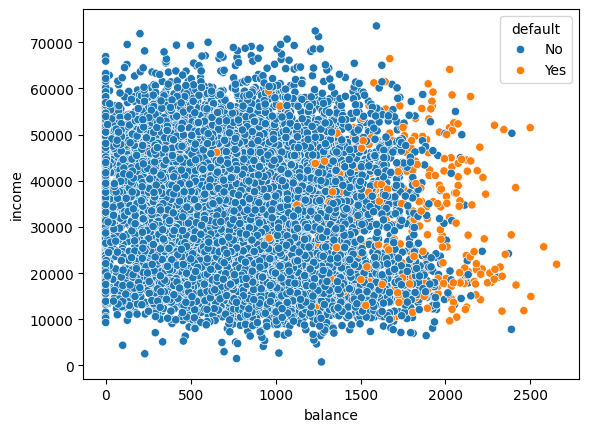

In [8]:
sns.scatterplot(data=df, x="balance", y="income", hue="default")

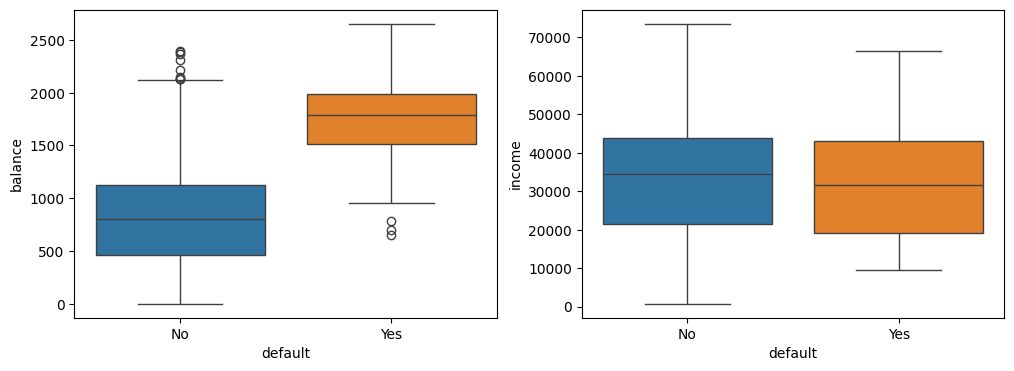

In [13]:
fig,ax = plt.subplots(1,2, figsize=(12,4))
for ax, col in zip(ax, ["balance", "income"]):
    sns.boxplot(data=df, x="default", y = col, ax=ax, hue="default")

## Dummy encoding 

In [15]:
pd.get_dummies(df, columns=["default", "student"]).head()

,balance,income,default_No,default_Yes,student_No,student_Yes
0,729.526495,44361.625074,True,False,True,False
1,817.180407,12106.134700,True,False,False,True
2,1073.549164,31767.138947,True,False,True,False
3,529.250605,35704.493935,True,False,True,False
4,785.655883,38463.495879,True,False,True,False


In [17]:
df = pd.get_dummies(df, columns=["default", "student"], drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,False,False
1,817.180407,12106.134700,False,True
2,1073.549164,31767.138947,False,False
3,529.250605,35704.493935,False,False
4,785.655883,38463.495879,False,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   balance      10000 non-null  float64
 1   income       10000 non-null  float64
 2   default_Yes  10000 non-null  bool   
 3   student_Yes  10000 non-null  bool   
dtypes: bool(2), float64(2)
memory usage: 175.9 KB


## Logistic regression

In [20]:
X, y = df.drop("default_Yes", axis=1), df["default_Yes"]
X.head()

,balance,income,student_Yes
0,729.526495,44361.625074,False
1,817.180407,12106.134700,True
2,1073.549164,31767.138947,False
3,529.250605,35704.493935,False
4,785.655883,38463.495879,False


In [23]:
y.value_counts()

default_Yes
False    9667
True      333
Name: count, dtype: int64

### Train|test split

In [26]:
from sklearn.model_selection import train_test_split

# help(train_test_split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

X_train.shape, X_test.shape, 

((6700, 3), (3300, 3))

In [27]:
y_train.value_counts()

default_Yes
False    6477
True      223
Name: count, dtype: int64

In [28]:
y_test.value_counts()

default_Yes
False    3190
True      110
Name: count, dtype: int64

## Scale dataset

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
scaled_X_train.mean(), scaled_X_train.std(), scaled_X_test.mean(), scaled_X_test.std()

(7.74173428514736e-17, 1.0, -0.005467573543403287, 0.9870951848219804)

## Logistic regression

In [33]:
from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=)
model = LogisticRegression(penalty=None)
model.fit(scaled_X_train, y_train)

# these are the parameters for logistic regression that we have trained from 
# our training data
model.coef_, model.intercept_


(array([[ 2.88848257,  0.00619039, -0.29011374]]), array([-6.36187634]))

### Test prediction

In [38]:
test_sample = pd.DataFrame(
    {"balance": [1500, 1500], "income": [40000, 40000], "student_Yes": [1, 0]}
)

test_sample


,balance,income,student_Yes
0,1500,40000,1
1,1500,40000,0


In [39]:
scaled_sample = scaler.transform(test_sample)
scaled_sample

array([[ 1.37268368,  0.47593334,  1.54286221],
       [ 1.37268368,  0.47593334, -0.64814602]])

In [41]:
model.predict_proba(scaled_sample)

array([[0.94488091, 0.05511909],
       [0.90077997, 0.09922003]])

In [42]:
model.predict(scaled_sample)

array([False, False])

## Predict on test data

In [43]:
y_pred_probability = model.predict_proba(scaled_X_test)
y_pred_probability

array([[9.30371604e-01, 6.96283964e-02],
       [9.98550654e-01, 1.44934591e-03],
       [9.99985392e-01, 1.46075512e-05],
       ...,
       [9.99735560e-01, 2.64440422e-04],
       [2.67332767e-01, 7.32667233e-01],
       [9.97654974e-01, 2.34502584e-03]])

In [44]:
# if we want another threshold for prediction 
# then we should do it on y_pred_probability
y_pred = model.predict(scaled_X_test)
y_pred

array([False, False, False, ..., False,  True, False])

## Evaluation

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99      3190
        True       0.72      0.30      0.42       110

    accuracy                           0.97      3300
   macro avg       0.85      0.65      0.70      3300
weighted avg       0.97      0.97      0.97      3300



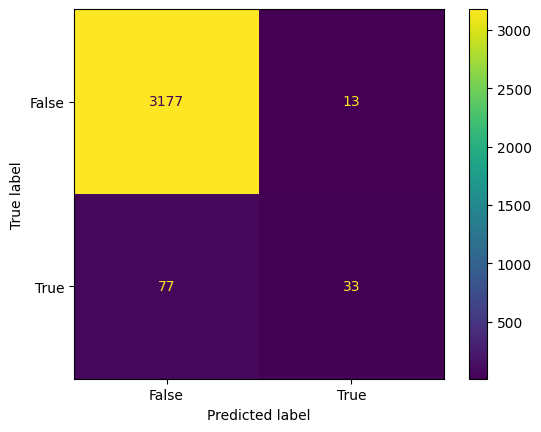

In [51]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()